# Import packages

In [2]:
# Numerical Packages
import numpy as np
import pandas as pd

#Common packages
import copy
from tqdm import tqdm
 
#Plot's Making  Packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

#System Packages
import importlib
import time
import os
from os.path import isdir, isfile, join

# Learning packages
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from joblib import dump, load

%config InlineBackend. figure_format = 'retina'

# Load Data via Pandas

In [3]:
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
Data_High_Level_Features_path =  HOMEPATH + "Data_High_Level_Features/"

if os.path.exists(HOMEPATH + "Data_ML/BDT") == 0:
    os.mkdir(HOMEPATH + "Data_ML/BDT")
    datapath = HOMEPATH + "Data_ML/"
    savepath = HOMEPATH + "Data_ML/BDT" + "/"
else: 
    datapath = HOMEPATH + "Data_ML/"
    savepath = HOMEPATH + "Data_ML/BDT" + "/"


try:
    
    data_train = {
            "herwig_ang_train" : 0,
            "pythia_def_train" : 0,
            "pythia_vin_train" : 0,
            "pythia_dip_train" : 0,
#             "sherpa_def_train" : 0
            }  
    
    data_test = {
            "herwig_ang_test" : 0,
            "pythia_def_test" : 0,
            "pythia_vin_test" : 0,
            "pythia_dip_test" : 0,
#             "sherpa_def_test" : 0
            }  
    
    data_val = {
            "herwig_ang_val" : 0,
            "pythia_def_val" : 0,
            "pythia_vin_val" : 0,
            "pythia_dip_val" : 0,
#             "sherpa_def_val" : 0
            }  
    
    for i, element in enumerate(data_train):
        data_train[element] = pd.read_csv(savepath + str(element) + ".csv")
        
    for i, element in enumerate(data_test):
        data_test[element] = pd.read_csv(savepath + str(element) + ".csv")
        
    for i, element in enumerate(data_val):
        data_val[element] = pd.read_csv(savepath + str(element) + ".csv")

    print("All Files are loaded!")

    print("H jet : QCD jet = 1 : 1")
    print("\r")
#     print("{:^8}{:^15}".format("","Pythia Default"))
#     print("{:^8}{:^15}".format("Train #",len(data_train["pythia_def_train"])))
#     print("{:^8}{:^15}".format("Test #",len(data_test["pythia_def_test"])))
#     print("{:^8}{:^15}".format("Val. #",len(data_val["pythia_def_val"])))
    
    
    train = [ len(data_train[element]) for j, element in enumerate(data_train)]
    test = [len(data_test[element]) for j, element in enumerate(data_test)]
    val = [len(data_val[element]) for j, element in enumerate(data_val)]
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole"))
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Train #",train[0],train[1],train[2],train[3]))
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Test #",test[0],test[1],test[2],test[3]))
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Val. #",val[0],val[1],val[2],val[3]))
    
    
    for i, element in enumerate(data_val):
        total_list = data_val[element].columns
        break
    
    print("total_list",total_list)

except:
    
    print("Please create training, test and validation datasets.")
    

All Files are loaded!
H jet : QCD jet = 1 : 1

        Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole 
Train #     288876         288876         288876         288876     
 Test #      61902          61902          61902          61902     
 Val. #      61902          61902          61902          61902     
total_list Index(['GEN', 'SHO', 'PRO', 'MJJ_0', 'delta_eta_0', 'XHH_0', 'MJ1_0', 'PTJ1_0',
       'eta1_0', 'phi1_0', 't211_0', 'D211_0', 'D221_0', 'C211_0', 'C221_0',
       'MJ2_0', 'PTJ2_0', 'eta2_0', 'phi2_0', 't212_0', 'D212_0', 'D222_0',
       'C212_0', 'C222_0', 'MJJ', 'delta_eta', 'XHH', 'MJ1', 'PTJ1', 'eta1',
       'phi1', 't211', 'D211', 'D221', 'C211', 'C221', 'MJ2', 'PTJ2', 'eta2',
       'phi2', 't212', 'D212', 'D222', 'C212', 'C222', 'four_b_tag',
       'three_b_tag', 'two_b_tag', 'eventindex', 'index', 'target'],
      dtype='object')


# BDT Training

In [23]:
%time
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
############################################################################################################################################################
  
# features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"] #7/14
features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0","MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"] # 7/14
#     features = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]

BDT_Model = {
              "herwig_ang" : 0,
              "pythia_def" : 0, 
              "pythia_vin" : 0, 
              "pythia_dip" : 0, 
#               "sherpa_def" : 0,
            }


for i,(model, trainingdata) in enumerate(zip(BDT_Model, data_train)): 
    

    try:
        BDT_Model[model] = load(savepath + str(model) + "_GBDT_leadingjet" + ".h5")
        print(str(model) + " BDT model is loaded!")
        
        
    except:
        print("Let's do training!")
        ticks_1 = time.time()
   
        rand = np.random.randint(1000000)
        clf_GBDT = GradientBoostingClassifier(
                    n_estimators=1000,
                    learning_rate=0.02,
                    max_depth=5, 
                    min_samples_split = 0.25,
                    min_samples_leaf = 0.05,
        #             min_impurity_split = 0.00001,
        #             validation_fraction = 0.1,
                    random_state= rand,  #np.random,
                    verbose = 1
                    )
        clf_GBDT.fit(
                    data_train[trainingdata][features],
                    data_train[trainingdata]["target"]
                    )
        
        dump(clf_GBDT, savepath + str(model) + "_GBDT_leadingjet" + ".h5")
        
        
        BDT_Model[model] = clf_GBDT

        ticks_2 = time.time()

        ############################################################################################################################################################
        ticks_3 = time.time()
        totaltime =  ticks_2 - ticks_1
        print("\033[3;33mTime consumption : {:.4f} min for GBDT\033[0;m".format(totaltime/60.))

CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 29.1 µs
Thu Jul 15 03:37:28 2021
herwig_ang BDT model is loaded!
pythia_def BDT model is loaded!
pythia_vin BDT model is loaded!
pythia_dip BDT model is loaded!


# Study the Performance of BDT

In [11]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"


BDT_model_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia", 
                 "Pythia Dipole", 
#                  "Sherpa Default"
                ]


Performance_Frame = {
                    "AUC" : 0,
                    "max_sig" : 0,
                    "r05" : 0
                    }



try:
    for metric in Performance_Frame:
        Performance_Frame[metric] = pd.read_csv(savepath + str(metric) + ".csv")
        
    print("All Performance_Frame are loaded!!")
    print("\n")

except:

    performance = {
    "AUC" : np.zeros((5,5)),
    "max_sig" : np.zeros((5,5)),
    "r05" : np.zeros((5,5))
    }

    for i, model in enumerate(BDT_Model):
        for j, testdata in enumerate(data_test):


            prediction_GBDT_test =  BDT_Model[model].predict_proba(data_test[testdata][features])
            discriminator_test = prediction_GBDT_test[:,axis]
            discriminator_test = discriminator_test/(max(discriminator_test))

            performance["AUC"][i,j] = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
            FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)
            tmp = np.where(FalsePositiveFull != 0)
            performance["max_sig"][i,j] = max(TruePositiveFull[tmp]/np.sqrt(FalsePositiveFull[tmp])) 
            tmp = np.where(TruePositiveFull >= 0.5)
            performance["r05"][i,j] = 1./FalsePositiveFull[tmp[0][0]]


    for i in performance:
        element = performance[i]

        Performance_Frame[i] = pd.DataFrame(
                        {"Herwig Angular": [element[0,0],element[1,0],element[2,0],element[3,0], np.average(element[:4,0]),np.std(element[:4,0])],
                         "Pythia Default": [element[0,1],element[1,1],element[2,1],element[3,1], np.average(element[:4,1]),np.std(element[:4,1])],
                         "Pythia Vincia":  [element[0,2],element[1,2],element[2,2],element[3,2], np.average(element[:4,2]),np.std(element[:4,2])],
                         "Pythia Dipole":  [element[0,3],element[1,3],element[2,3],element[3,3], np.average(element[:4,3]),np.std(element[:4,3])],
                         "Average": [np.average(element[0,:4]),np.average(element[1,:4]),np.average(element[2,:4]),np.average(element[3,:4]),0,0],
                         "STD": [np.std(element[0,:4]),np.std(element[1,:4]),np.std(element[2,:4]),np.std(element[3,:4]),0,0]
                        },
                        index=["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Average", "STD"]
                                    )

        Performance_Frame[i].to_csv(savepath + str(i) + ".csv")

print("Models are trained by row and test to column.")
print("\r")

for element in Performance_Frame:
    number = Performance_Frame[element]
    print("Performance in "+ str(element))
    print("\r")
    print("{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}{:^10}{:^10}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default", "Average", "STD"))

    for i, _ in enumerate(BDT_model_name):
        print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(BDT_model_name[i],number["Herwig Angular"][i], number["Pythia Default"][i], number["Pythia Vincia"][i], number["Pythia Dipole"][i], 0, number["Average"][i], number["STD"][i]))

    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",number["Herwig Angular"][i+1], number["Pythia Default"][i+1], number["Pythia Vincia"][i+1], number["Pythia Dipole"][i+1], 0))
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",number["Herwig Angular"][i+2], number["Pythia Default"][i+2], number["Pythia Vincia"][i+2], number["Pythia Dipole"][i+2], 0))
    print("\r")


All Performance_Frame are loaded!!


Models are trained by row and test to column.

Performance in AUC

               Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default  Average     STD    
Herwig Angular      0.912          0.884          0.889          0.906          0.000       0.898     0.012   
Pythia Default      0.898          0.900          0.901          0.901          0.000       0.900     0.001   
 Pythia Vincia      0.901          0.897          0.903          0.906          0.000       0.902     0.003   
 Pythia Dipole      0.905          0.885          0.894          0.910          0.000       0.899     0.010   
    Average         0.904          0.892          0.897          0.906          0.000     
      STD           0.005          0.007          0.006          0.003          0.000     

Performance in max_sig

               Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default  Average     STD    
Herwig Angular      4.2

# Feature Importances

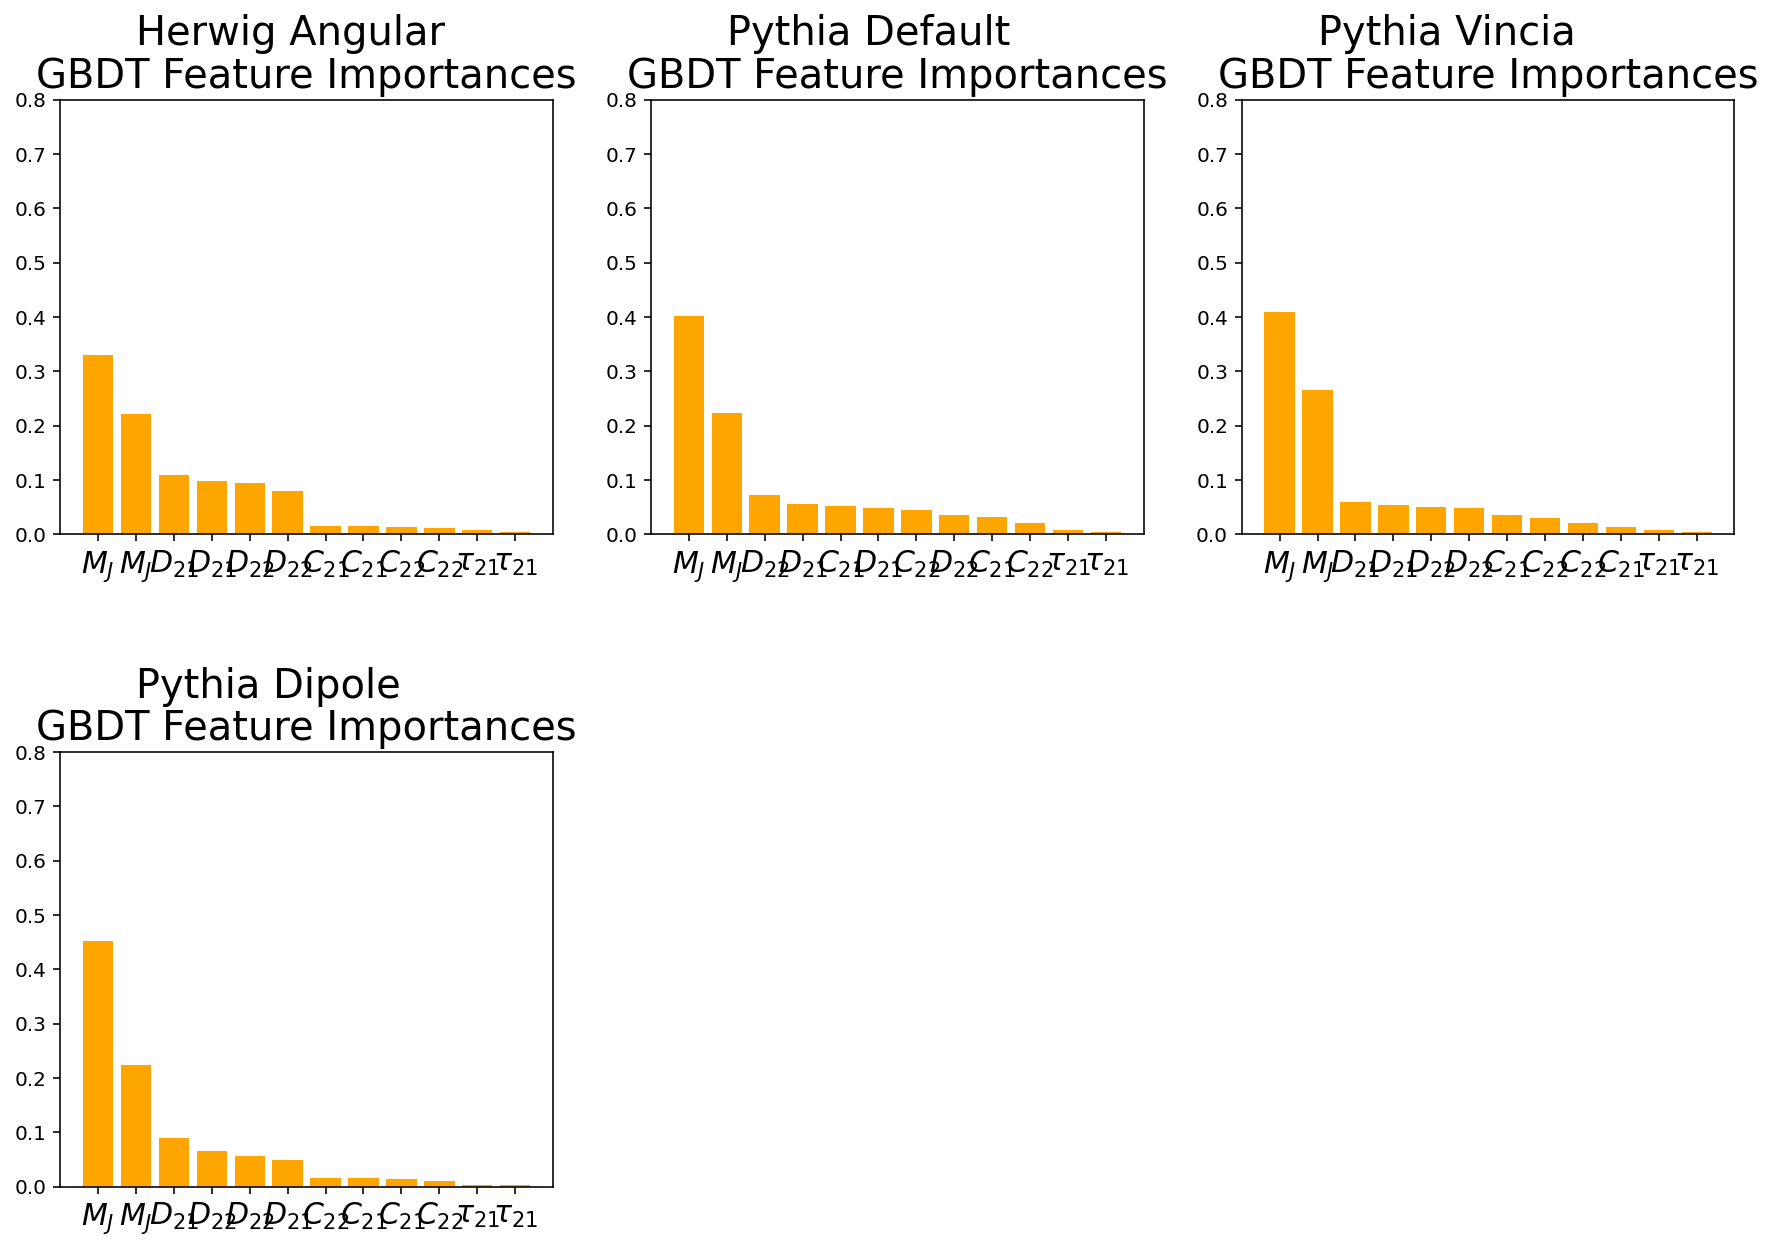

In [15]:
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]
feature_namelist = ["$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$",
                   "$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$"]

plt.figure(figsize=(15,10))
for i,(model, trainingdata) in enumerate(zip(BDT_Model, data_train)):
    plot_axis = plt.subplot(2,3,i+1)

    importances = BDT_Model[model].feature_importances_
    # std = np.std([tree.feature_importances_ for tree in clf_GBDT.estimators_],
    #              axis=0)
    indices = np.argsort(importances)[::-1]
    namelist_inorder = []
    for index in indices:
        namelist_inorder.append(feature_namelist[index])
    
    plt.title("GBDT Feature Importances",fontsize=20)

    plot_axis.bar(range(data_train[trainingdata][features].shape[1]), 
             importances[indices],
             color="orange", 
    #          yerr=std[indices], 
             align="center")
    
    plot_axis.set_ylim((0,0.8))
    plot_axis.text(x=1, y=0.9, s=str(BDT_model_name[i]),fontsize=20) 
    plot_axis.set_xticks([0,1,2,3,4,5,
                         6,7,8,9,10,11])
    plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)
    

#     plot_axis.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
#     plot_axis.grid(True)
    

# plt.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
# plt.xlim([-1, X_train.shape[1]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

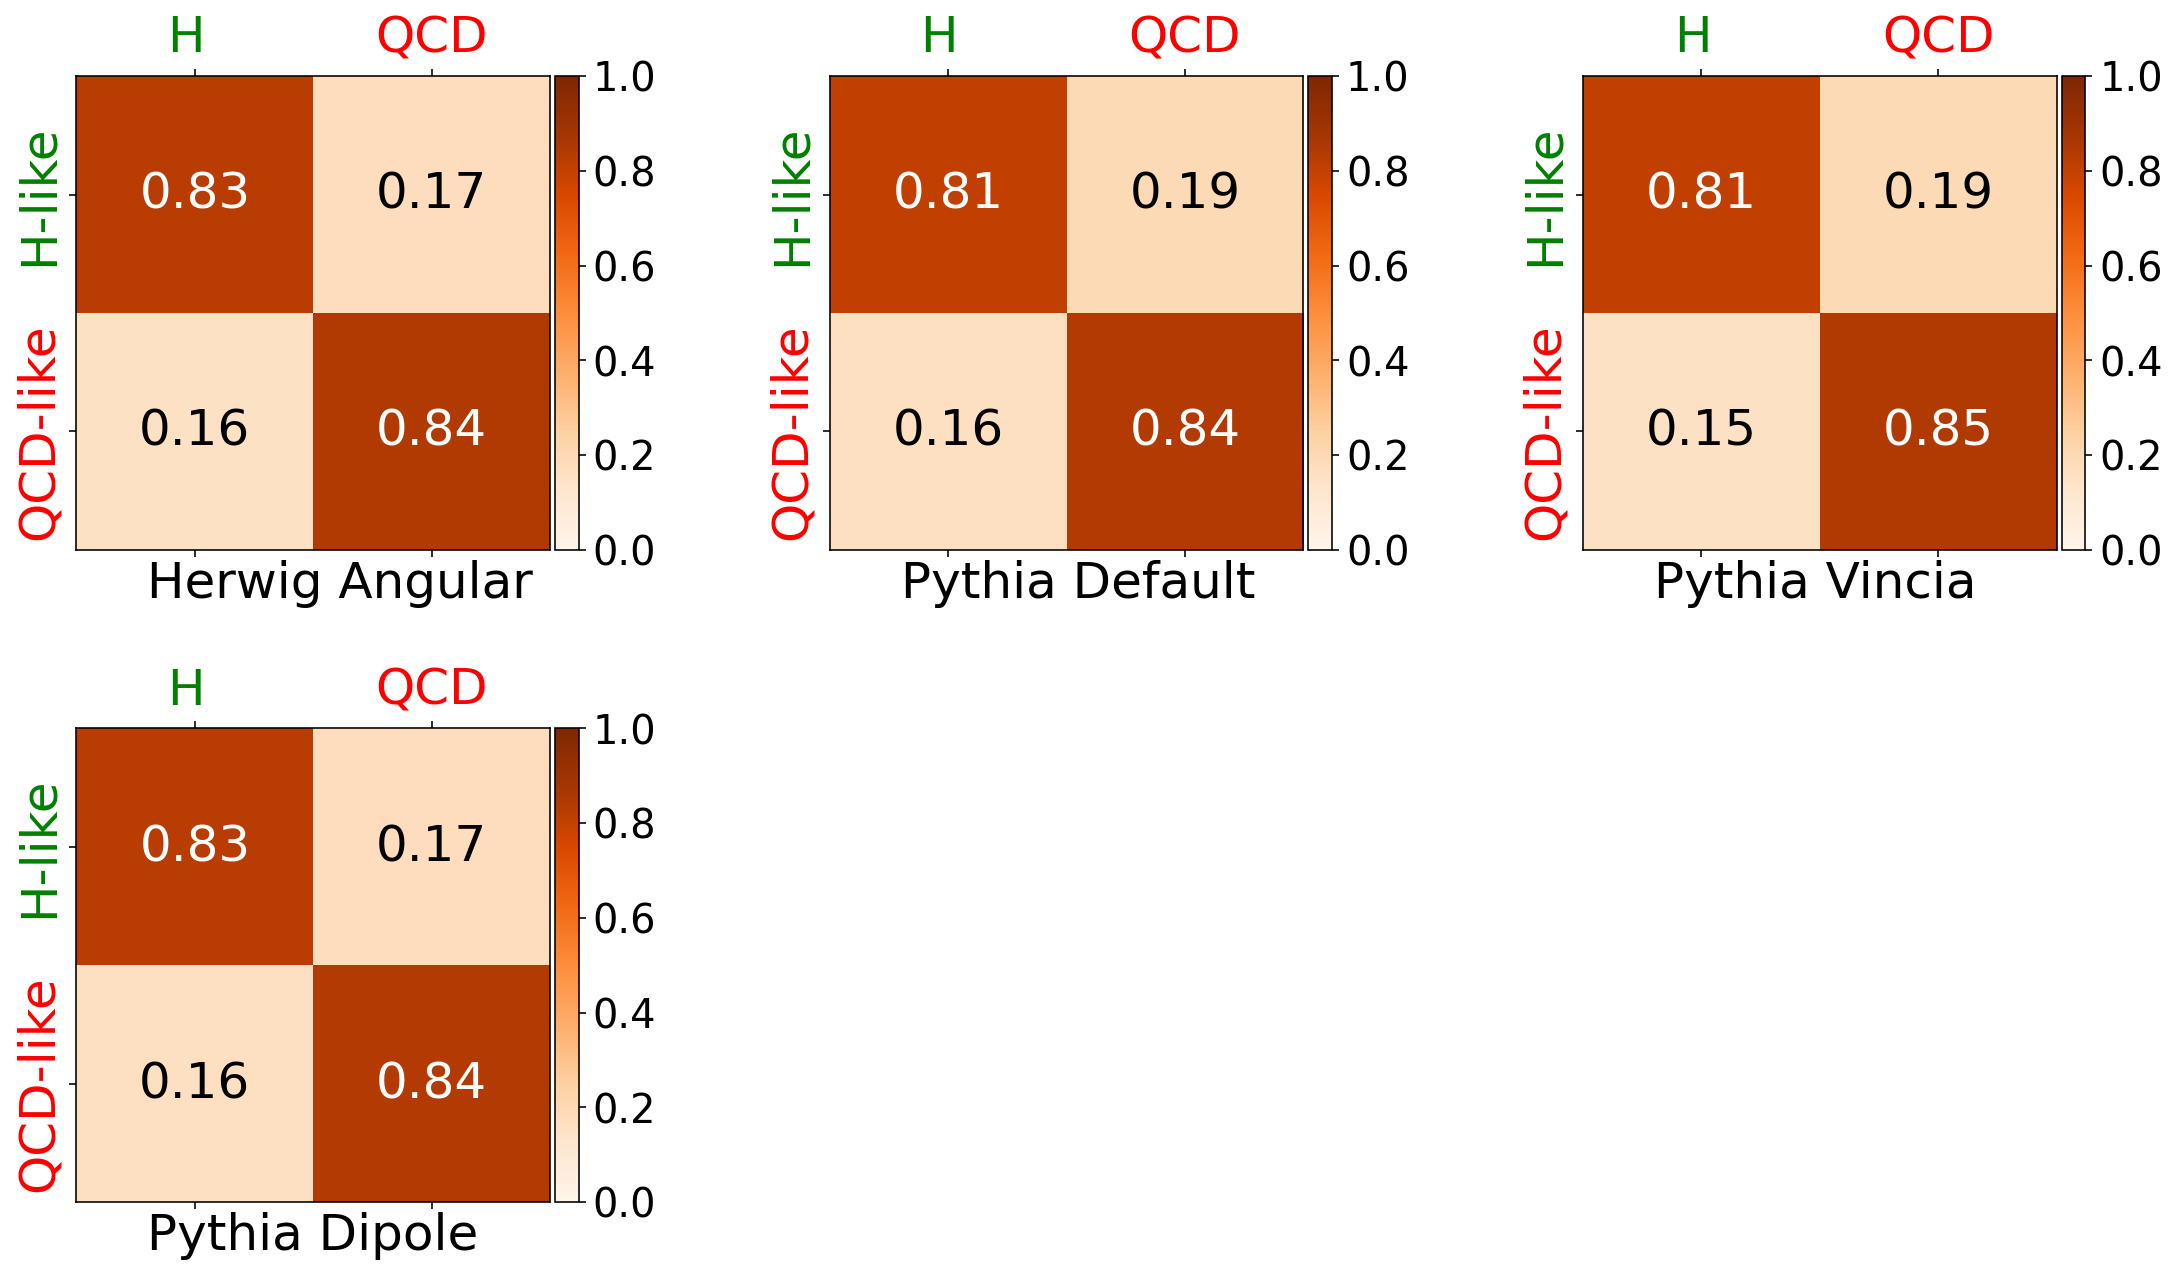

In [18]:
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]
feature_namelist = ["$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$",
                   "$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$"]

plt.figure(figsize=(18,12))
for index,(model, testdata) in enumerate(zip(BDT_Model, data_test)):
    plot_axis = plt.subplot(2,3,index+1)

    clf_GBDT = load(savepath + model + "_GBDT_leadingjet" + ".h5")
    confusion = confusion_matrix(data_test[testdata]["target"], BDT_Model[model].predict(data_test[testdata][features]))
    
 

    ratio, eff = np.zeros(16), np.zeros(16)
    k = 0
    for i in range(2):
        for j in range(2):
            ratio[k] = (confusion[j][i]/np.sum(confusion,axis=0)[i])*100.
            eff[k] = (confusion[i][j]/np.sum(confusion,axis=1)[i])*100.
            k += 1

#     print("{:^8}  {:^8} {:^8} {:^9} {:^9} ".format("","No ratio","Yes ratio","No eff.","Yes eff."))
#     print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} ".format("No-like",ratio[0],ratio[1],eff[0],eff[2]))
#     print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} ".format("Yes-like",ratio[2],ratio[3],eff[1],eff[3]))

    truelist = ["H ","QCD"]
    likelist = ["H-like","QCD-like"]

    s = len(truelist)
#     f, ax = plt.subplots(1,1, figsize=(s+5, s+5))

    confusion_ = np.array([[ ratio[0],ratio[1]],
                           [ ratio[2],ratio[3]]])/100.

    aa = plot_axis.matshow(confusion_, cmap="Oranges",vmin=0, vmax=1)

    divider = make_axes_locatable(plot_axis)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(aa, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    plot_axis.set_xticks(range(confusion_.shape[1]))
    plot_axis.set_xticklabels(truelist, fontsize=25, rotation=0)
    plot_axis.set_yticks(range(confusion_.shape[1]))
    plot_axis.set_yticklabels(likelist, fontsize=25, rotation=90, verticalalignment ="center")
    my_colors = ["green","red","blue","magenta"]

    for ticklabel, tickcolor in zip(plot_axis.get_xticklabels(), my_colors):
        ticklabel.set_color(tickcolor)

    for ticklabel, tickcolor in zip(plot_axis.get_yticklabels(), my_colors):
        ticklabel.set_color(tickcolor)

    for (i, j), z in np.ndenumerate(confusion_):
        if z >=0.5:
            colors = "white"
        elif z <= -0.5:
            colors = "red"
        else :
            colors = "black"
        plot_axis.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',fontsize=25,color=colors)
    
    
#     plot_axis.text(0.2, -0.8, "True", color = "green",fontsize=25)
#     plot_axis.text(-1.1, 1.2, "Predicted", color = "blue", rotation=90,fontsize=25)
    plot_axis.text(x=-0.2, y=1.7, s=str(BDT_model_name[index]),fontsize=25) 


    


# plt.tight_layout()
# plt.savefig("./Figures/confusion_matrix.pdf", transparent=True, bbox_inches='tight', pad_inches=0)
plt.subplots_adjust(wspace=0.5, hspace=0.0)
plt.show()

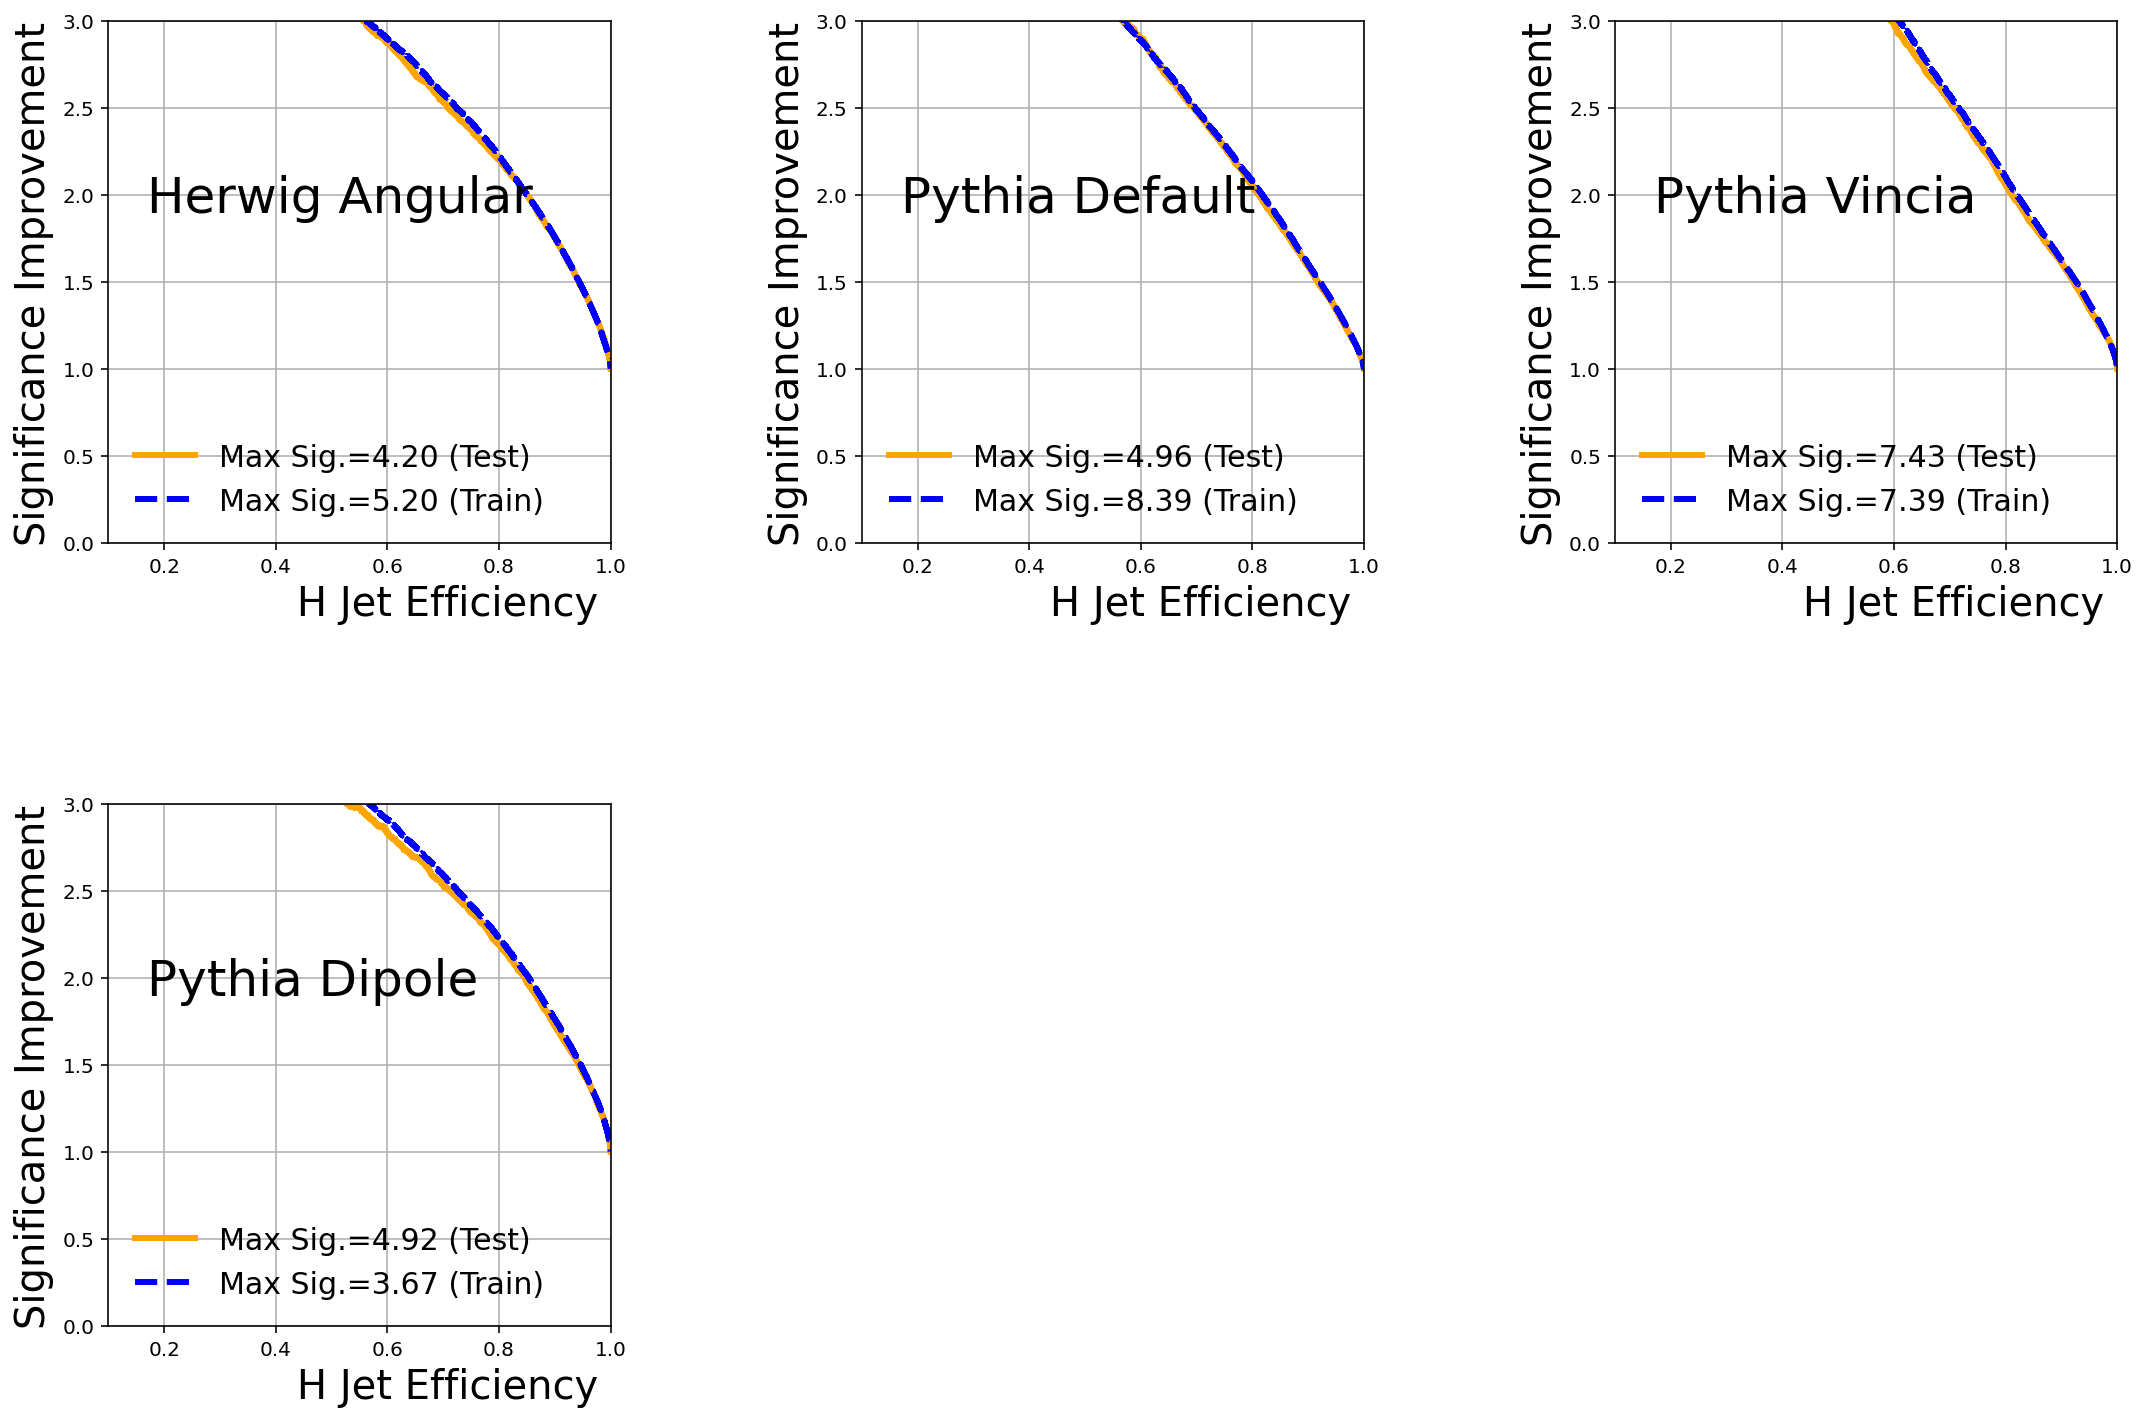

In [19]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

plt.figure(figsize=(18,12))
for i,(model, tainingdata, testdata) in enumerate(zip(BDT_Model, data_train, data_test)):
    plot_axis = plt.subplot(2,3,i+1)


#     plot_axis.text(x=1, y=0.7, s=str(BDT_model_name[i]),fontsize=20) 
#     plot_axis.set_xticks([0,1,2,3,4,5])
#     plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)


    prediction_GBDT_test = BDT_Model[model].predict_proba(data_test[testdata][features])
    prediction_GBDT_train = BDT_Model[model].predict_proba(data_train[tainingdata][features])

    
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_GBDT_test = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
    FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)

    train_auc_GBDT_train = metrics.roc_auc_score(data_train[tainingdata]["target"],discriminator_train)
    FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(data_train[tainingdata]["target"],discriminator_train)
 
    # plt.plot(TruePositiveFull_GBDT_test,1./FalsePositiveFull_GBDT_test,"--", color='b', linewidth = 5, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))
#     a = np.where(TruePositiveFull_GBDT_test > 0.1)
#     b = np.where(TruePositiveFull_GBDT_train > 0.1)
    a = np.where(FalsePositiveFull_GBDT_test != 0)
    b = np.where(FalsePositiveFull_GBDT_train != 0)
    
    max_sig_test = max(TruePositiveFull_GBDT_test[a]/np.sqrt(FalsePositiveFull_GBDT_test[a]))
    max_sig_train = max(TruePositiveFull_GBDT_train[b]/np.sqrt(FalsePositiveFull_GBDT_train[b]))
    plt.plot(TruePositiveFull_GBDT_test[a],TruePositiveFull_GBDT_test[a]/np.sqrt(FalsePositiveFull_GBDT_test[a]),"-", color='orange', linewidth = 3, label='Max Sig.={0:.2f} (Test)'.format(max_sig_test))
    plt.plot(TruePositiveFull_GBDT_train[b],TruePositiveFull_GBDT_train[b]/np.sqrt(FalsePositiveFull_GBDT_train[b]),"--", color='b', linewidth = 3, label='Max Sig.={0:.2f} (Train)'.format(max_sig_train))

# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0.1,1))
    plot_axis.set_ylim((0,3))
    # plt.yscale("log")
    plt.xlim((0,1))
#     plt.ylim((1, 1E+4))
#     plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel(str(process)+' Efficiency ', fontsize=20,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('Significance Improvement', fontsize=20,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
    plot_axis.text(x=0.17, y=1.9, s=str(BDT_model_name[i]),fontsize=25) 
    #     plt.tight_layout()

    plot_axis.set_xlim((0.1,1))
#     plot_axis.set_ylim((1, 2E+2))
#     plot_axis.set_yscale("log")
    plot_axis.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

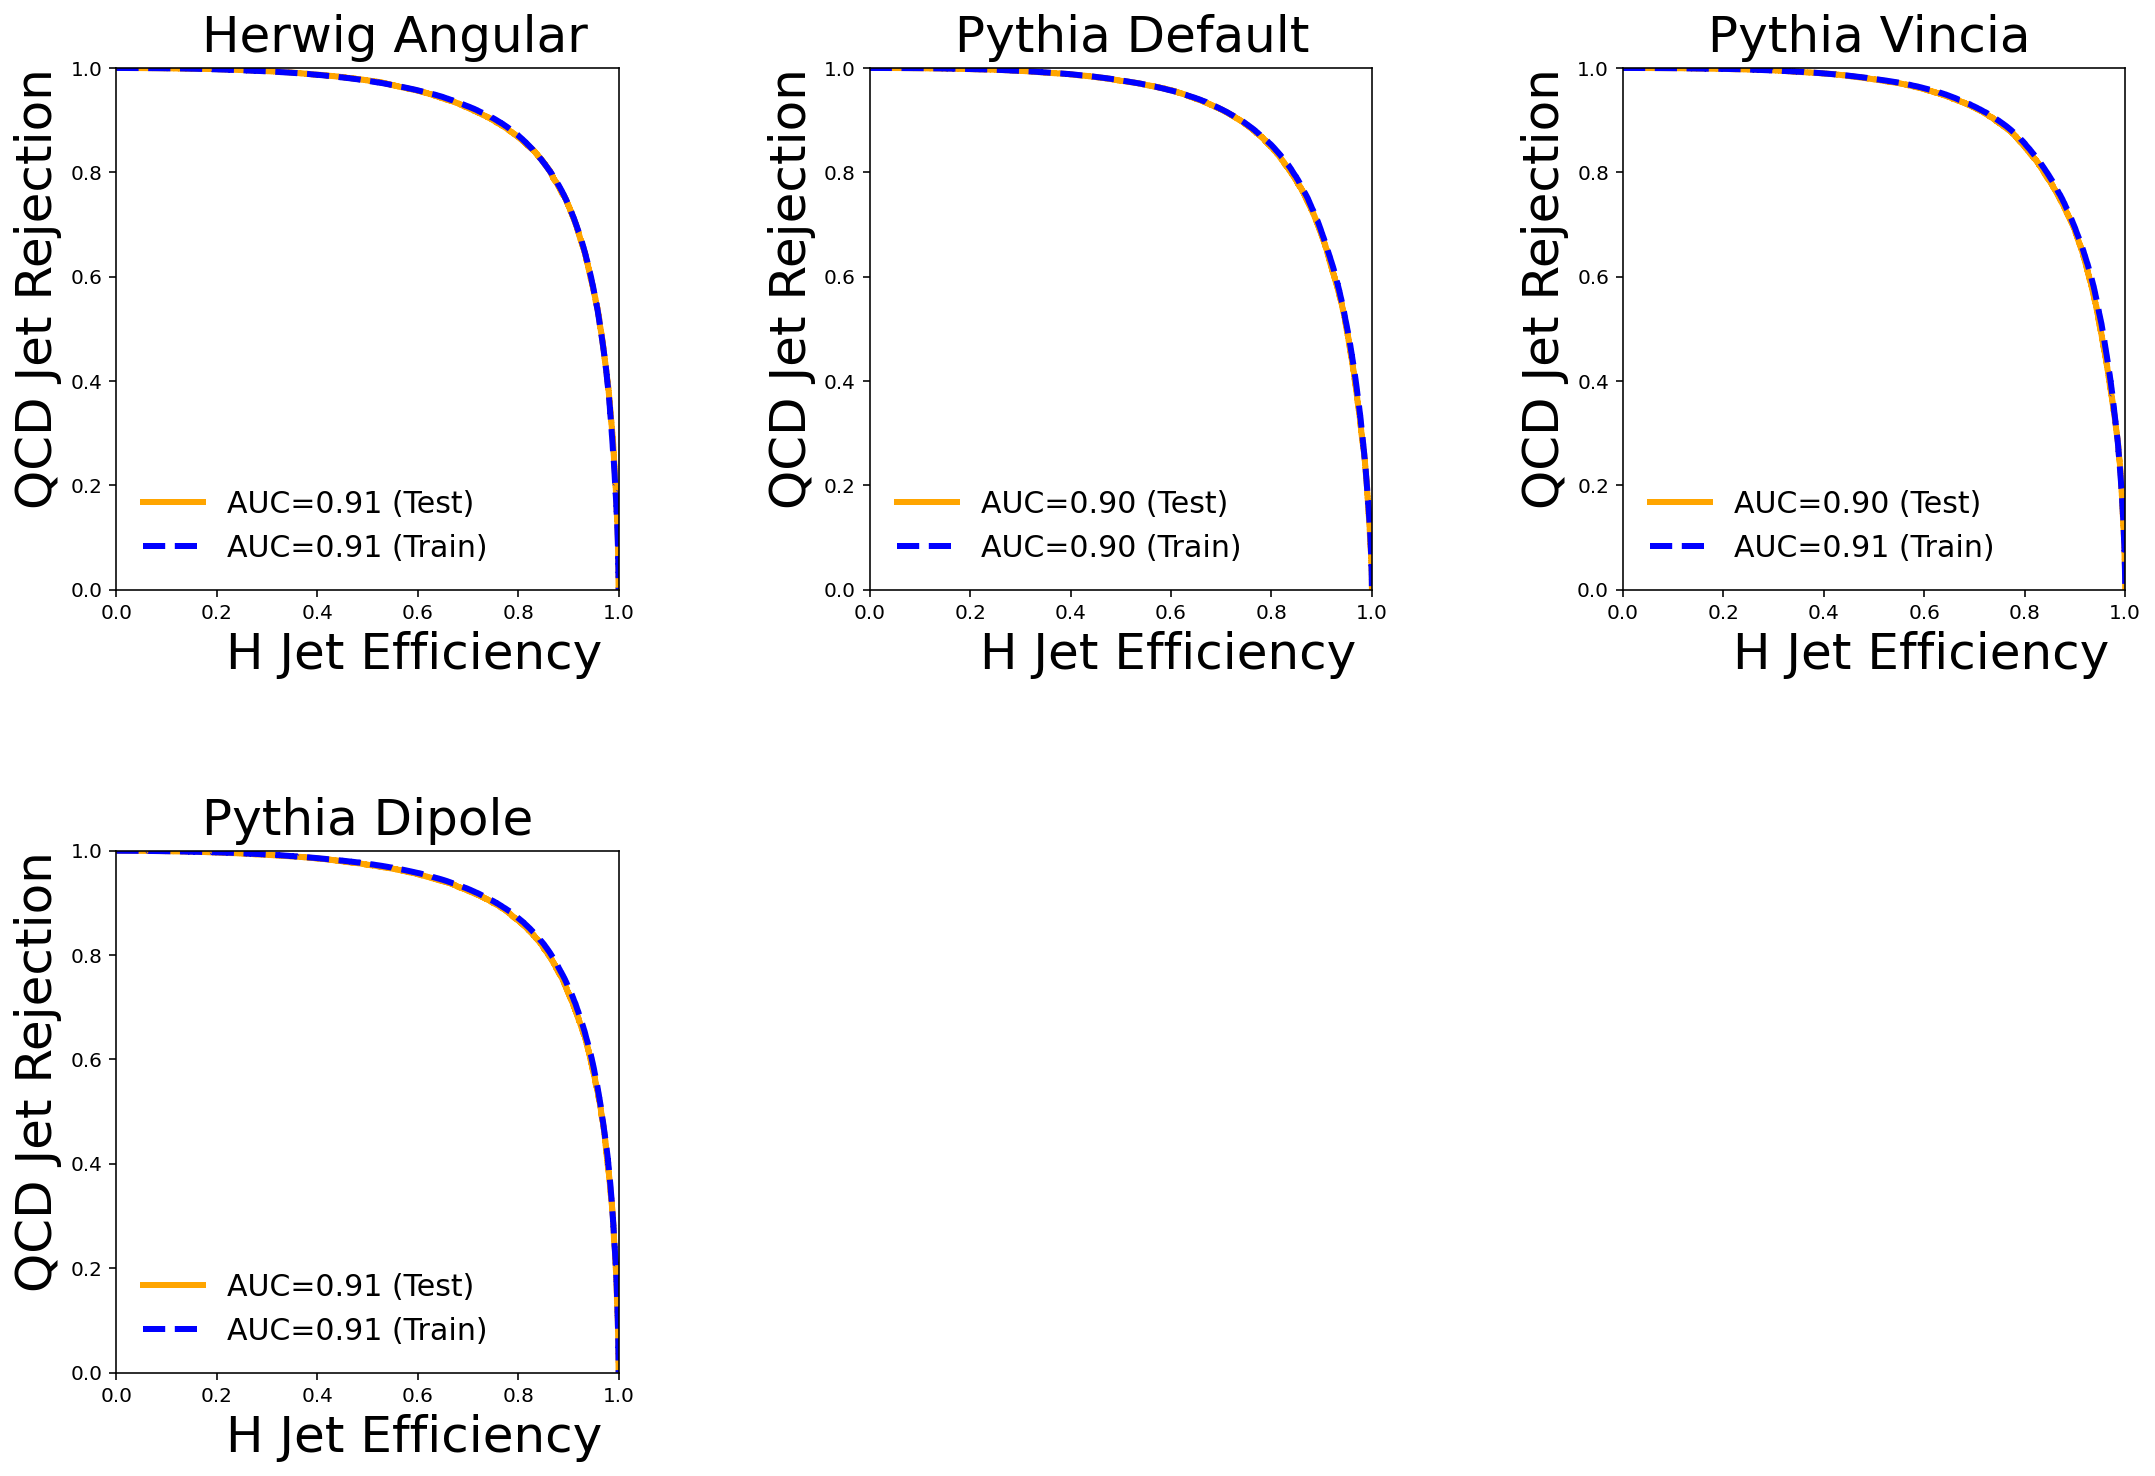

In [20]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

    
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

plt.figure(figsize=(18,12))
for i,(model, tainingdata, testdata) in enumerate(zip(BDT_Model, data_train, data_test)):
    plot_axis = plt.subplot(2,3,i+1)

    prediction_GBDT_test = BDT_Model[model].predict_proba(data_test[testdata][features])
    prediction_GBDT_train = BDT_Model[model].predict_proba(data_train[tainingdata][features])

    
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    
    test_auc_GBDT_test = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
    FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)

    train_auc_GBDT_train = metrics.roc_auc_score(data_train[tainingdata]["target"],discriminator_train)
    FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(data_train[tainingdata]["target"],discriminator_train)
 
    # plt.plot(TruePositiveFull_GBDT_test,1./FalsePositiveFull_GBDT_test,"--", color='b', linewidth = 5, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))

    plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_GBDT_test))
    plt.plot(TruePositiveFull_GBDT_train,1-FalsePositiveFull_GBDT_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_GBDT_train))
#     plt.plot(TruePositiveFull_GBDT_test[50:]/(FalsePositiveFull_GBDT_test[50:])**0.5, label="aaa") 


# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0,1))
    plot_axis.set_ylim((0,1))
    # plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel(str(process)+' Efficiency ', fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('QCD Jet Rejection', fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
    plot_axis.text(x=0.17, y=1.03, s=str(BDT_model_name[i]),fontsize=25) 

# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

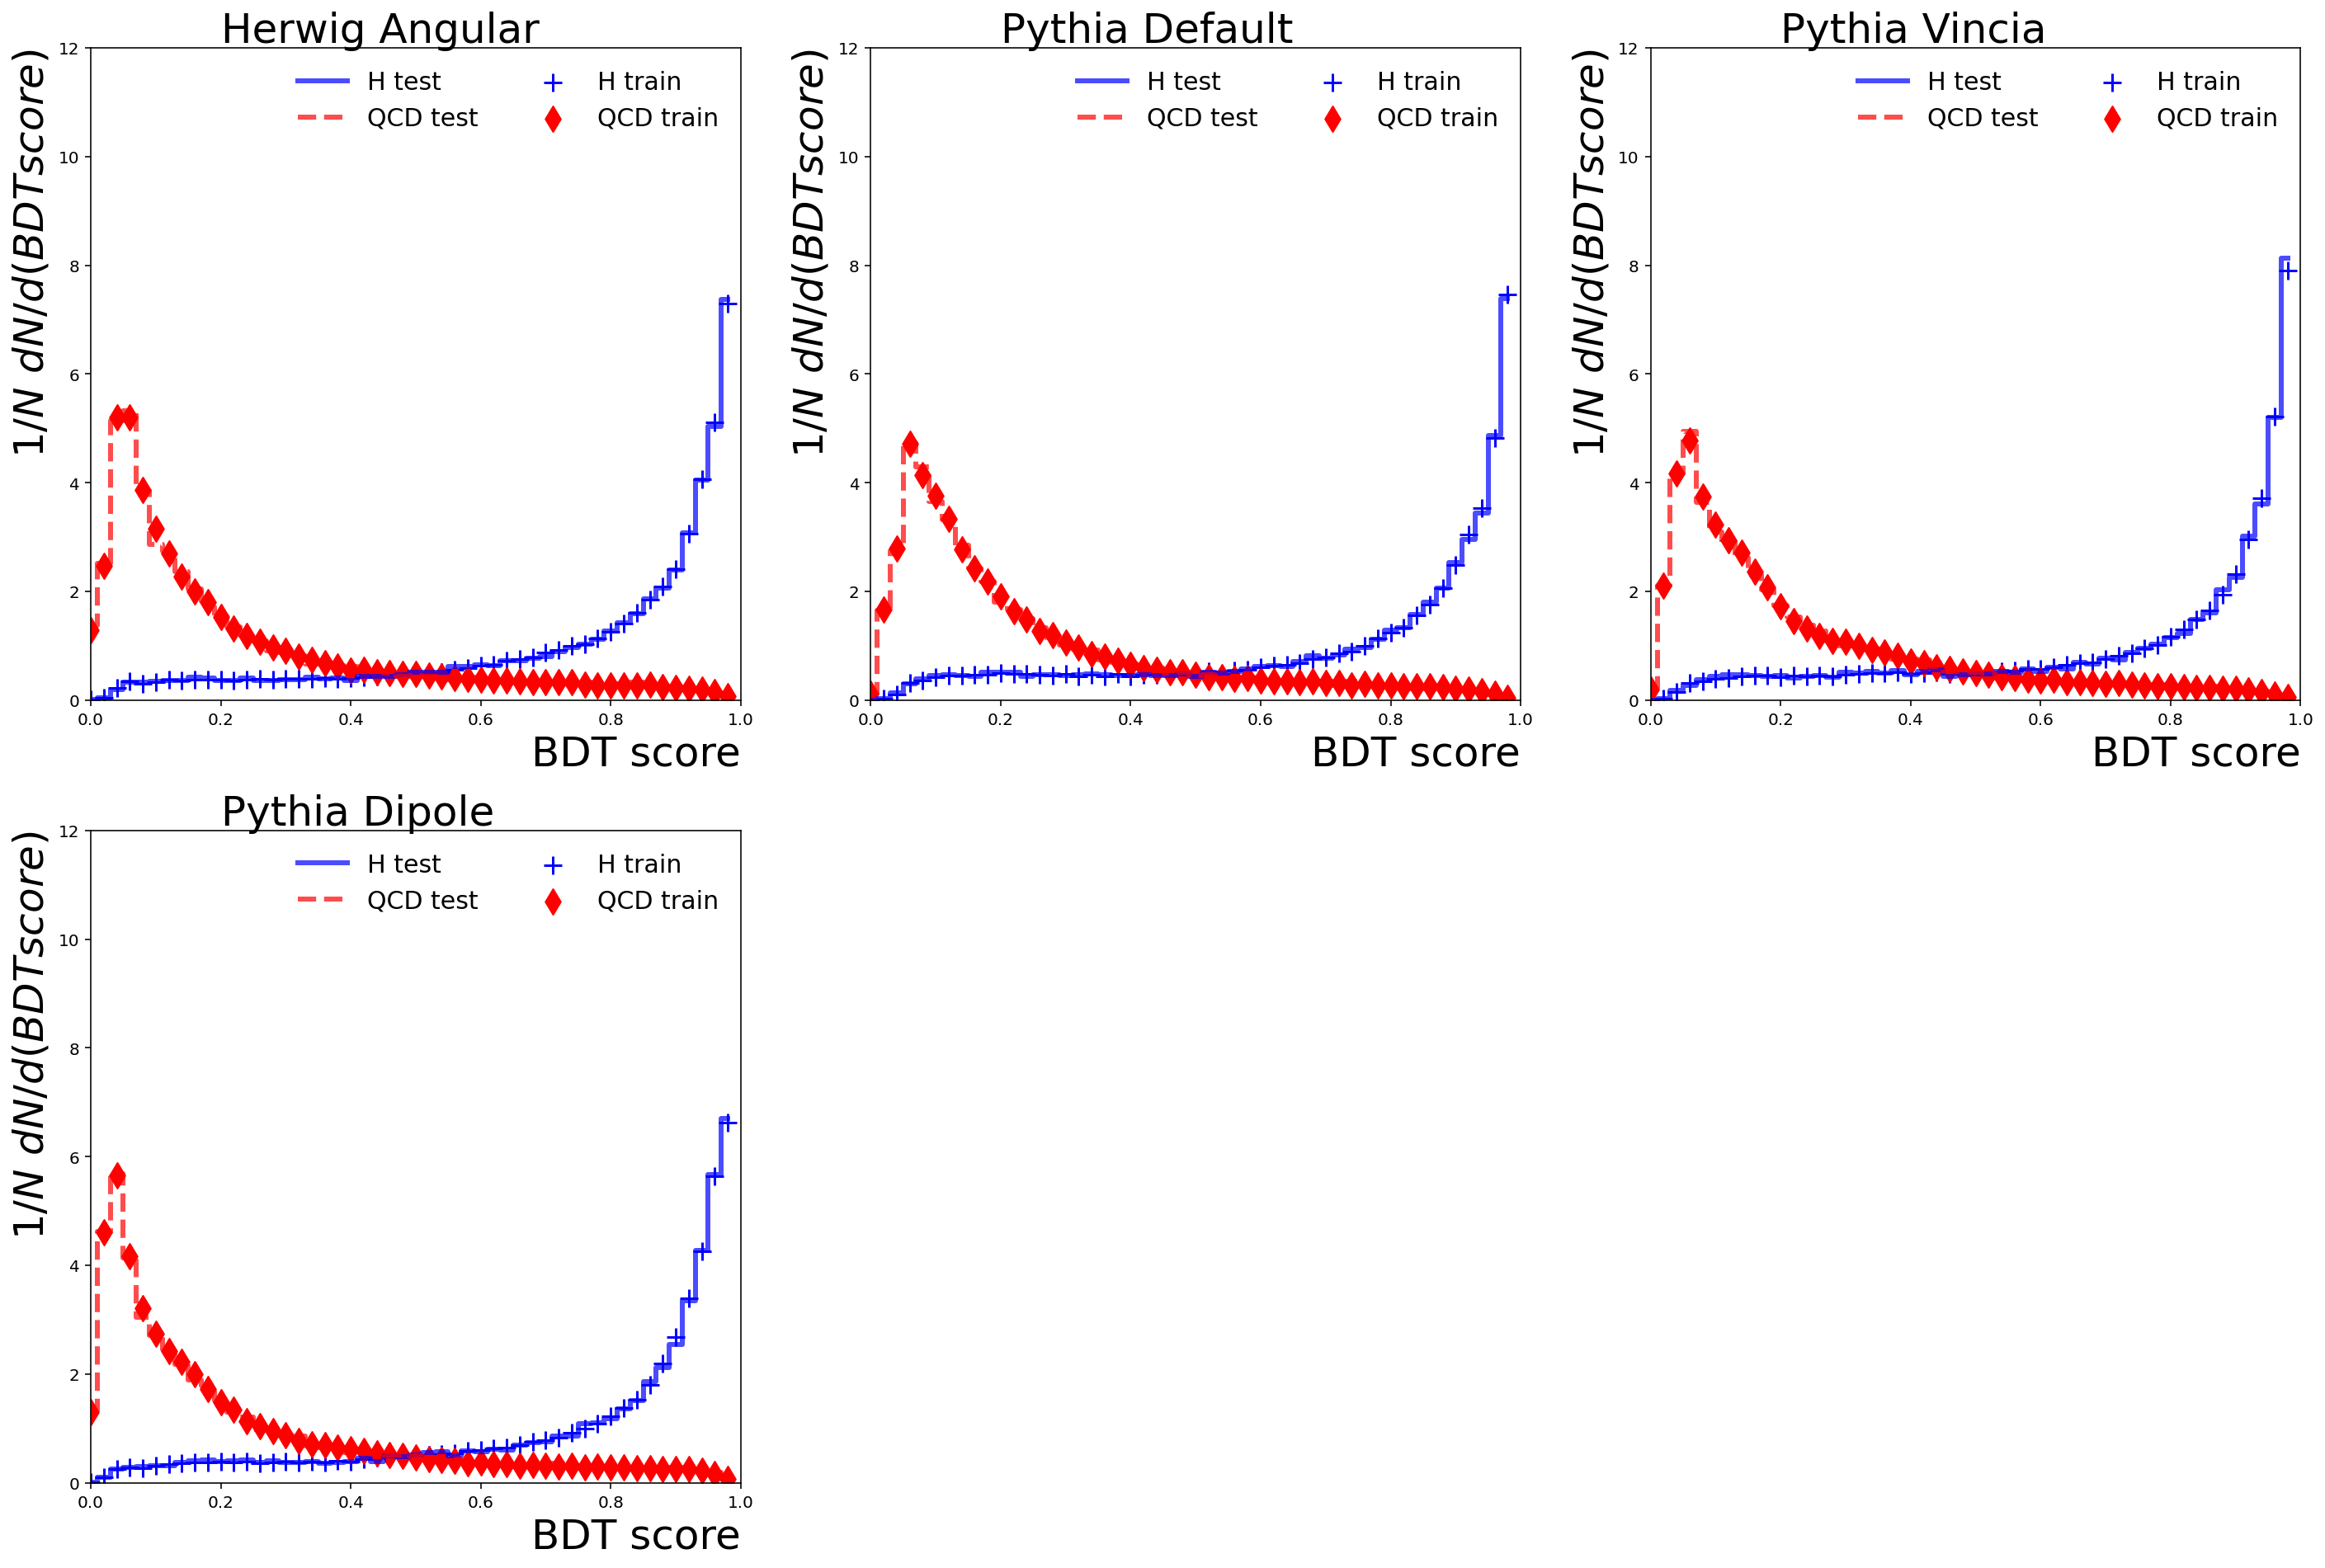

In [21]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

    
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

plt.figure(figsize=(24,16))
for i,(model, tainingdata, testdata) in enumerate(zip(BDT_Model, data_train, data_test)):
    plot_axis = plt.subplot(2,3,i+1)

    prediction_GBDT_test = BDT_Model[model].predict_proba(data_test[testdata][features])
    prediction_GBDT_train = BDT_Model[model].predict_proba(data_train[tainingdata][features])

    
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))

    xbin = np.linspace(0,1,51)
    Datatest = pd.DataFrame()
    Datatest["target"] = to_categorical(data_test[testdata]["target"])[:,axis]
    Datatest["pre"] = discriminator_test
    inner = Datatest[Datatest["target"]==1]
    outter = Datatest[Datatest["target"]==0]

    H_hist, H_bins = np.histogram(inner["pre"], bins=xbin)
    plot_axis.step(H_bins[:-1], H_hist.astype(np.float32)/sum(H_hist)/0.02, "-",color = "blue", where='mid',linewidth=3, alpha=0.7,label="H test") 
    QCD_hist, QCD_bins = np.histogram(outter["pre"], bins=xbin)
    plot_axis.step(QCD_bins[:-1], QCD_hist.astype(np.float32)/sum(QCD_hist)/0.02, "--",color = "red", where='mid',linewidth=3, alpha=0.7,label="QCD test") 


    Datatrain = pd.DataFrame()
    Datatrain["target"] = to_categorical(data_train[tainingdata]["target"])[:,axis]
    Datatrain["pre_train"] = discriminator_train
    inner = Datatrain[Datatrain["target"]==1]
    outter = Datatrain[Datatrain["target"]==0]

    H_hist, H_bins = np.histogram(inner["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
    plot_axis.scatter(H_bins[:-1], H_hist.astype(np.float32)/sum(H_hist)/0.02 ,marker = "+",c ="b",s=120,label="H train")
    QCD_hist, QCD_bins = np.histogram(outter["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
    plot_axis.scatter(QCD_bins[:-1], QCD_hist.astype(np.float32)/sum(QCD_hist)/0.02 ,marker = "d",c ="r",s=120,label="QCD train")
    
    

    plot_axis.set_xlim(0,1)
    plot_axis.set_ylim(0,12)
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
    plot_axis.set_xlabel("BDT score", fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel("$1/N\,\,dN/d (BDT score)$",fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(loc="best",ncol=2,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0)
    plot_axis.text(x=0.2, y=12.1, s=str(BDT_model_name[i]),fontsize=25) 
        
# plt.savefig("./Higgs_Pt/BDT_score.pdf", transparent=True)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [13]:
# axis = 1
# if axis == 0:
#     process = "QCD"
# elif axis == 1:
#     process = "H Jet"

# plt.figure(figsize=(6,6))


# clf_GBDT = load(savepath + "Pythia Default" + "_GBDT" + "_" + str(preprocess) + ".h5")

# prediction_CNN_herwig_ang = clf_GBDT.predict_proba(XTEST[0])[:,axis]
# prediction_CNN_pythia_def = clf_GBDT.predict_proba(XTEST[1])[:,axis]
# prediction_CNN_pythia_vin= clf_GBDT.predict_proba(XTEST[2])[:,axis]
# prediction_CNN_pythia_dip = clf_GBDT.predict_proba(XTEST[3])[:,axis]
# prediction_CNN_sherpa_def = clf_GBDT.predict_proba(XTEST[4])[:,axis]




# # discriminator_test = discriminator_test/(max(discriminator_test))
# # discriminator_train = discriminator_train/(max(discriminator_train))
    


# test_auc_herwig_ang = metrics.roc_auc_score(YTEST[0],prediction_CNN_herwig_ang)
# FalsePositiveFull_herwig_ang, TruePositiveFull_herwig_ang, _ = metrics.roc_curve(YTEST[0],prediction_CNN_herwig_ang)

# test_auc_pythia_def = metrics.roc_auc_score(YTEST[1],prediction_CNN_pythia_def)
# FalsePositiveFull_pythia_def, TruePositiveFull_pythia_def, _ = metrics.roc_curve(YTEST[1],prediction_CNN_pythia_def)

# test_auc_pythia_vin = metrics.roc_auc_score(YTEST[2],prediction_CNN_pythia_vin)
# FalsePositiveFull_pythia_vin, TruePositiveFull_pythia_vin, _ = metrics.roc_curve(YTEST[2],prediction_CNN_pythia_vin)

# test_auc_pythia_dip = metrics.roc_auc_score(YTEST[3],prediction_CNN_pythia_dip)
# FalsePositiveFull_pythia_dip, TruePositiveFull_pythia_dip, _ = metrics.roc_curve(YTEST[3],prediction_CNN_pythia_dip)

# test_auc_sherpa_def = metrics.roc_auc_score(YTEST[4],prediction_CNN_sherpa_def)
# FalsePositiveFull_sherpa_def, TruePositiveFull_sherpa_def, _ = metrics.roc_curve(YTEST[4],prediction_CNN_sherpa_def)

# #     plt.plot(TruePositiveFull_CNN_test,1-FalsePositiveFull_CNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_CNN_test))
# #     plt.plot(TruePositiveFull_CNN_train,1-FalsePositiveFull_CNN_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_CNN_train))
# plt.plot(TruePositiveFull_herwig_ang,1./FalsePositiveFull_herwig_ang,"-", color='orange', linewidth = 2, label='Herwig Ang. AUC={0:.2f}'.format(test_auc_herwig_ang))
# plt.plot(TruePositiveFull_pythia_def,1./FalsePositiveFull_pythia_def,"-", color='b', linewidth = 2, label='Pythia Def. AUC={0:.2f}'.format(test_auc_pythia_def))
# plt.plot(TruePositiveFull_pythia_vin,1./FalsePositiveFull_pythia_vin,"-.", color='r', linewidth = 2, label='Pythia Vin. AUC={0:.2f}'.format(test_auc_pythia_vin))
# plt.plot(TruePositiveFull_pythia_dip,1./FalsePositiveFull_pythia_dip,"-", color='g', linewidth = 2, label='Pythia Dip. AUC={0:.2f}'.format(test_auc_pythia_dip))
# plt.plot(TruePositiveFull_sherpa_def,1./FalsePositiveFull_sherpa_def,"-", color='k', linewidth = 2, label='Serpa Def. AUC={0:.2f}'.format(test_auc_sherpa_def))

# # plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# # plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')


# plt.xlim((0.1,1))
# plt.ylim((1, 2E+2))
# plt.yscale("log")
# #     plot_axis.set_tick_params(axis='x', labelsize=25)
# #     plot_axis.set_tick_params(axis='y', labelsize=25)
#     # ax.yaxis.set_major_locator(MaxNLocator(5))
#     # ax.xaxis.set_major_locator(MaxNLocator(5))
# plt.xlabel(str(process)+' Efficiency ', fontsize=25,horizontalalignment='right',x=1)
# plt.ylabel('1/[QCD Jet Rejection]', fontsize=25,horizontalalignment='right',y=1)
# plt.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
# #     plt.tight_layout()
# # plt.text(x=0.17, y=1.03, s=str(CNN_model_name[i]),fontsize=25) 
# plt.grid()
# # plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
# # plt.subplots_adjust(wspace=0.5, hspace=0.5)
# plt.show()

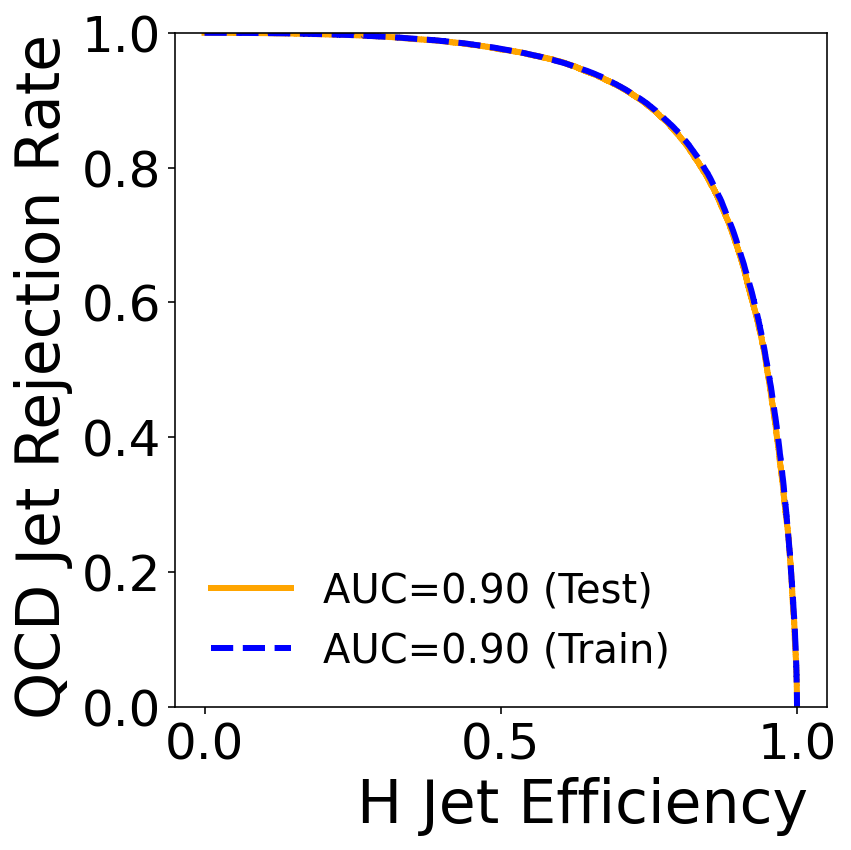

In [24]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

# features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"]

prediction_GBDT_test = BDT_Model["pythia_def"].predict_proba(data_test["pythia_def_test"][features])
prediction_GBDT_train = BDT_Model["pythia_def"].predict_proba(data_train["pythia_def_train"][features])


discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

test_auc_GBDT_test = metrics.roc_auc_score(data_test["pythia_def_test"]["target"],discriminator_test)
FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(data_test["pythia_def_test"]["target"],discriminator_test)

train_auc_GBDT_train = metrics.roc_auc_score(data_train["pythia_def_train"]["target"],discriminator_train)
FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(data_train["pythia_def_train"]["target"],discriminator_train)


fig, ax = plt.subplots(1,1, figsize=(6,6))


# plt.plot(TruePositiveFull_GBDT_test,1/FalsePositiveFull_GBDT_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_GBDT_test))
# plt.plot(TruePositiveFull_GBDT_train,1/FalsePositiveFull_GBDT_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_GBDT_train))
# plt.ylim((1,1E+4))
# plt.yscale("log")


plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_GBDT_test))
plt.plot(TruePositiveFull_GBDT_train,1-FalsePositiveFull_GBDT_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_GBDT_train))
plt.ylim((0,1))



ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.ylabel('QCD Jet Rejection Rate', fontsize=30,horizontalalignment='right',y=1)
plt.xlabel(str(process)+' Efficiency ', fontsize=30,horizontalalignment='right',x=1)
plt.legend(ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()


# plt.savefig("./Plots/Comparison_ROC_all.pdf", transparent=True, bbox_inches='tight')
plt.show()

# $H$ Tagger applied on leading jet and sub-leading jet

In [8]:
features_j1 = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"]


prediction_GBDT_test = BDT_Model["pythia_def"].predict_proba(data_test["pythia_def_test"][features_j1])
prediction_GBDT_train = BDT_Model["pythia_def"].predict_proba(data_train["pythia_def_train"][features_j1])


discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

data_test["pythia_def_test"]["predict_j1"] = discriminator_test
data_train["pythia_def_train"]["predict_j1"] = discriminator_train


features_j2 = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]

prediction_GBDT_test = BDT_Model["pythia_def"].predict_proba(data_test["pythia_def_test"][features_j2])
prediction_GBDT_train = BDT_Model["pythia_def"].predict_proba(data_train["pythia_def_train"][features_j2])


discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

data_test["pythia_def_test"]["predict_j2"] = discriminator_test
data_train["pythia_def_train"]["predict_j2"] = discriminator_train



ValueError: X has 6 features, but DecisionTreeRegressor is expecting 12 features as input.

* Selected efficiency of leading jet: 0.5

* Selected efficiency of sub-leading jet: 0.8



In [17]:
sample = data_test["pythia_def_test"]
eff1j = 0.5
eff2j = 0.8

H = sample[sample["target"] == 1]
QCD = sample[sample["target"] == 0]
a = len(H)
a_ = len(QCD)
print("Original # of H: {} and # of QCD: {} ".format(a,a_))
print("#########")
cut_j1 = 0
for i in range(0,1001):
    tmp = H[H["predict_j1"] >= cut_j1]
    
    if len(tmp)/len(H) < eff1j:
        print("cut_j1: {:.3f}".format(cut_j1))
        break
        
    cut_j1 += 1/1000
    
    
H = sample[(sample["target"] == 1) & (sample["predict_j1"] >= cut_j1)]
QCD = sample[(sample["target"] == 0) & (sample["predict_j1"] >= cut_j1)]
b = len(H)
b_ = len(QCD)
print("Passing 1st jet BDT cut at eff.: {} # of H: {} and # of QCD: {} ".format(eff1j,b,b_))
print("total rate: H: {:.3f} QCD: {:.6f} ".format(b/a,b_/a_))
print("#########")

cut_j2 = 0
for i in range(0,1001):
    tmp = H[H["predict_j2"] >= cut_j2]
    
    if len(tmp)/len(H) < eff2j:
        print("cut_j2: {:.3f}".format(cut_j2))
        break
        
    cut_j2 += 1/1000

H = sample[(sample["target"] == 1) & (sample["predict_j1"] >= cut_j1) & (sample["predict_j2"] >= cut_j2)]
QCD = sample[(sample["target"] == 0) & (sample["predict_j1"] >= cut_j1) & (sample["predict_j2"] >= cut_j2)]
c = len(H)
c_ = len(QCD)
print("Passing 2nd jet BDT cut at eff.: {} # of H: {} and # of QCD: {} ".format(eff2j,c,c_))
print("total rate: H: {:.3f} QCD: {:.6f} ".format(c/a,c_/a_))
print("#########")
H = H[H["four_b_tag"] == 1]
QCD = QCD[QCD["four_b_tag"] == 1]
d = len(H)
d_ = len(QCD)
print("Passing 4b tag: # of H: {} and # of QCD: {} ".format(d,d_))
# print(d/c,d_/c_)
print("total rate: H: {:.3f} QCD: {:.6f} ".format(d/a,d_/a_))

Original # of H: 41226 and # of QCD: 41226 
#########
cut_j1: 0.774
Passing 1st jet BDT cut at eff.: 0.5 # of H: 20611 and # of QCD: 2098 
total rate: H: 0.500 QCD: 0.050890 
#########
cut_j2: 0.345
Passing 2nd jet BDT cut at eff.: 0.8 # of H: 16465 and # of QCD: 936 
total rate: H: 0.399 QCD: 0.022704 
#########
Passing 4b tag: # of H: 15392 and # of QCD: 398 
total rate: H: 0.373 QCD: 0.009654 
